In [1]:
!wget https://download.europe.naverlabs.com//virtual_kitti_2.0.3/vkitti_2.0.3_rgb.tar
!mkdir -p vkitti_rgb
!tar -xf /content/vkitti_2.0.3_rgb.tar -C vkitti_rgb


--2025-11-15 16:40:40--  https://download.europe.naverlabs.com//virtual_kitti_2.0.3/vkitti_2.0.3_rgb.tar
Resolving download.europe.naverlabs.com (download.europe.naverlabs.com)... 110.234.56.25
Connecting to download.europe.naverlabs.com (download.europe.naverlabs.com)|110.234.56.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7532472320 (7.0G) [application/x-tar]
Saving to: ‘vkitti_2.0.3_rgb.tar’

vkitti_2.0.3_rgb.ta 100%[===================>]   7.01G  19.4MB/s    in 7m 11s  

2025-11-15 16:47:52 (16.7 MB/s) - ‘vkitti_2.0.3_rgb.tar’ saved [7532472320/7532472320]



In [2]:
!wget https://download.europe.naverlabs.com//virtual_kitti_2.0.3/vkitti_2.0.3_classSegmentation.tar
!mkdir -p vkitti_gt
!tar -xf /content/vkitti_2.0.3_classSegmentation.tar -C vkitti_gt


--2025-11-15 16:50:10--  https://download.europe.naverlabs.com//virtual_kitti_2.0.3/vkitti_2.0.3_classSegmentation.tar
Resolving download.europe.naverlabs.com (download.europe.naverlabs.com)... 110.234.56.25
Connecting to download.europe.naverlabs.com (download.europe.naverlabs.com)|110.234.56.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1015961600 (969M) [application/x-tar]
Saving to: ‘vkitti_2.0.3_classSegmentation.tar’

vkitti_2.0.3_classS 100%[===================>] 968.90M  19.2MB/s    in 52s     

2025-11-15 16:51:04 (18.5 MB/s) - ‘vkitti_2.0.3_classSegmentation.tar’ saved [1015961600/1015961600]



In [3]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip
!mkdir /content/kitti
! unzip /content/data_semantics.zip -d kitti

--2025-11-15 16:52:18--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.169.197, 3.5.136.213, 3.5.138.206, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.169.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327699796 (313M) [application/zip]
Saving to: ‘data_semantics.zip’

data_semantics.zip  100%[===================>] 312.52M  20.2MB/s    in 15s     

2025-11-15 16:52:34 (20.7 MB/s) - ‘data_semantics.zip’ saved [327699796/327699796]

Archive:  /content/data_semantics.zip
   creating: kitti/testing/
   creating: kitti/testing/image_2/
  inflating: kitti/testing/image_2/000000_10.png  
  inflating: kitti/testing/image_2/000001_10.png  
  inflating: kitti/testing/image_2/000002_10.png  
  inflating: kitti/testing/image_2/000003_10.png  
  inflating: kitti/testing/image_2/000004_10.png  
  inflating: kitti/testing/image

Dataset

In [5]:
import sys
sys.path.append("/content/Optimal_data_augmentation")
from my_datasets import SegDataset
import torch
from torch.utils.data import DataLoader , random_split

image_dirs = [
    "/content/vkitti_rgb/Scene01/clone/frames/rgb/Camera_0",
    # "/content/vkitti_rgb/Scene02/clone/frames/rgb/Camera_0",
    # "/content/vkitti_rgb/Scene06/clone/frames/rgb/Camera_0",
    # "/content/vkitti_rgb/Scene18/clone/frames/rgb/Camera_0",
    # "/content/vkitti_rgb/Scene20/clone/frames/rgb/Camera_0",
]

mask_dirs = [
    "/content/vkitti_gt/Scene01/clone/frames/classSegmentation/Camera_0/",
    # "/content/vkitti_gt/Scene02/clone/frames/classSegmentation/Camera_0/",
    # "/content/vkitti_gt/Scene06/clone/frames/classSegmentation/Camera_0/",
    # "/content/vkitti_gt/Scene18/clone/frames/classSegmentation/Camera_0/",
    # "/content/vkitti_gt/Scene20/clone/frames/classSegmentation/Camera_0/",
]
train_set = SegDataset(image_dirs=image_dirs,mask_dirs=mask_dirs, dataset_type='vkitti',aug_case=None)
train_loader = DataLoader(
    train_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)


In [6]:
val_test_set = SegDataset("/content/kitti/training/image_2", "/content/kitti/training/semantic_rgb/", dataset_type='kitti',aug_case=None)
size = int(0.5 * len(val_test_set))
generator = torch.Generator().manual_seed(42)
val_set, test_set = random_split(val_test_set, [size,size], generator=generator)
val_loader = DataLoader(
    val_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
test_loader = DataLoader(
    test_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)

Baselines

In [133]:
from models import train_model
Segnet=SimpleSegNet()
train_model(Segnet, train_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch 01: Train Loss=2.1281 | Val Loss=4.5458 | Val mIoU=0.1593


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 02: Train Loss=1.8030 | Val Loss=1.8437 | Val mIoU=0.1071


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 03: Train Loss=1.7087 | Val Loss=1.4193 | Val mIoU=0.1708


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 04: Train Loss=1.6097 | Val Loss=1.8712 | Val mIoU=0.1566


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 05: Train Loss=1.6011 | Val Loss=1.6935 | Val mIoU=0.1576


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 06: Train Loss=1.5954 | Val Loss=1.8086 | Val mIoU=0.1826


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Epoch 07: Train Loss=1.4956 | Val Loss=1.7673 | Val mIoU=0.1814


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 08: Train Loss=1.4794 | Val Loss=1.6623 | Val mIoU=0.1853


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch 09: Train Loss=1.5105 | Val Loss=1.9708 | Val mIoU=0.1700


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 10: Train Loss=1.5161 | Val Loss=1.6826 | Val mIoU=0.1863


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 11: Train Loss=1.4649 | Val Loss=1.4936 | Val mIoU=0.1788


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 12: Train Loss=1.4343 | Val Loss=1.6386 | Val mIoU=0.1997


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 13: Train Loss=1.4145 | Val Loss=1.6484 | Val mIoU=0.1734


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch 14: Train Loss=1.4264 | Val Loss=1.4497 | Val mIoU=0.1925


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

Epoch 15: Train Loss=1.3643 | Val Loss=1.8008 | Val mIoU=0.1606
Training complete.


In [134]:
iou_per_class, mean_iou= evaluate_segmentation(model=Segnet, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

0.1643727421760559


# Color jitter

In [ ]:
cj_set = SegDataset(image_dirs=image_dirs,mask_dirs=mask_dirs, dataset_type='vkitti',aug_case='CJ')
cj_loader = DataLoader(
    cj_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
train_model(Segnet,cj_loader, val_loader, num_epochs=20, lr=1e-3, device='cuda')

Epoch 1/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 01: Train Loss=0.5900 | Val Loss=1.2006 | Val mIoU=0.2619


Epoch 2/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 02: Train Loss=0.6400 | Val Loss=1.3510 | Val mIoU=0.2915


Epoch 3/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 03: Train Loss=0.7116 | Val Loss=1.4428 | Val mIoU=0.2800


Epoch 4/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 04: Train Loss=0.6038 | Val Loss=1.4973 | Val mIoU=0.2577


Epoch 5/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


Epoch 05: Train Loss=0.4894 | Val Loss=1.1726 | Val mIoU=0.2928


Epoch 6/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Epoch 06: Train Loss=0.4502 | Val Loss=1.1948 | Val mIoU=0.3155


Epoch 7/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 07: Train Loss=0.4427 | Val Loss=1.3704 | Val mIoU=0.3004


Epoch 8/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 08: Train Loss=0.4304 | Val Loss=1.0398 | Val mIoU=0.3513


Epoch 9/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 09: Train Loss=0.4375 | Val Loss=0.9350 | Val mIoU=0.3651


Epoch 10/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 10: Train Loss=0.4428 | Val Loss=1.1570 | Val mIoU=0.3358


Epoch 11/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 11: Train Loss=0.4250 | Val Loss=1.9256 | Val mIoU=0.2330


Epoch 12/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 12: Train Loss=0.4030 | Val Loss=0.8911 | Val mIoU=0.3771


Epoch 13/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 13: Train Loss=0.3946 | Val Loss=1.3828 | Val mIoU=0.3023


Epoch 14/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 14: Train Loss=0.4042 | Val Loss=1.2902 | Val mIoU=0.3255


Epoch 15/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 15: Train Loss=0.3694 | Val Loss=1.7476 | Val mIoU=0.2308


Epoch 16/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 16: Train Loss=0.3418 | Val Loss=1.1186 | Val mIoU=0.3567


Epoch 17/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 17: Train Loss=0.3688 | Val Loss=1.0813 | Val mIoU=0.3444


Epoch 18/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 18: Train Loss=0.3278 | Val Loss=0.9945 | Val mIoU=0.3621


Epoch 19/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 19: Train Loss=0.3266 | Val Loss=1.0622 | Val mIoU=0.3584


Epoch 20/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

Epoch 20: Train Loss=0.3173 | Val Loss=1.3208 | Val mIoU=0.3124
Training complete.


In [ ]:
iou_per_class, mean_iou= evaluate_segmentation(model=Segnet, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

0.35424336791038513


# RGBS

In [ ]:
rgbs_set = SegDataset(image_dirs,mask_dirs, dataset_type='vkitti',aug_case='RGBS')
rgbs_loader = DataLoader(
    rgbs_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
train_model(Segnet,cj_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 01: Train Loss=0.3154 | Val Loss=1.0766 | Val mIoU=0.3582


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 02: Train Loss=0.3708 | Val Loss=2.1445 | Val mIoU=0.2608


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 03: Train Loss=0.3826 | Val Loss=2.6254 | Val mIoU=0.2330


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 04: Train Loss=0.3653 | Val Loss=1.7384 | Val mIoU=0.2514


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 05: Train Loss=0.3353 | Val Loss=1.3905 | Val mIoU=0.2525


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 06: Train Loss=0.3203 | Val Loss=1.5313 | Val mIoU=0.3374


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 07: Train Loss=0.3009 | Val Loss=1.6056 | Val mIoU=0.2928


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 08: Train Loss=0.3058 | Val Loss=2.0467 | Val mIoU=0.2939


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 09: Train Loss=0.2958 | Val Loss=1.3705 | Val mIoU=0.3193


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 10: Train Loss=0.3000 | Val Loss=1.1779 | Val mIoU=0.3632


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 11: Train Loss=0.3222 | Val Loss=1.4247 | Val mIoU=0.2918


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 12: Train Loss=0.3281 | Val Loss=1.0834 | Val mIoU=0.3368


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 13: Train Loss=0.3179 | Val Loss=1.8138 | Val mIoU=0.2891


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 14: Train Loss=0.2955 | Val Loss=1.5488 | Val mIoU=0.2997


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

Epoch 15: Train Loss=0.3154 | Val Loss=2.0868 | Val mIoU=0.2801
Training complete.


In [ ]:
iou_per_class, mean_iou= evaluate_segmentation(model=Segnet, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

0.30440300703048706


BLUR

In [ ]:
blur_set = SegDataset(image_dirs,mask_dirs, dataset_type='vkitti',aug_case='BLUR')
blur_loader = DataLoader(
    blur_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
train_model(Segnet,blur_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 01: Train Loss=0.2955 | Val Loss=1.8828 | Val mIoU=0.2399


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 02: Train Loss=0.3195 | Val Loss=1.1443 | Val mIoU=0.3617


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 03: Train Loss=0.2878 | Val Loss=1.2964 | Val mIoU=0.3030


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 04: Train Loss=0.2695 | Val Loss=1.5853 | Val mIoU=0.2805


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 05: Train Loss=0.2633 | Val Loss=2.1165 | Val mIoU=0.2606


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 06: Train Loss=0.2768 | Val Loss=1.2812 | Val mIoU=0.3020


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 07: Train Loss=0.2668 | Val Loss=1.3247 | Val mIoU=0.3019


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


Epoch 08: Train Loss=0.2701 | Val Loss=1.6808 | Val mIoU=0.2858


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 09: Train Loss=0.2480 | Val Loss=1.7551 | Val mIoU=0.2719


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 10: Train Loss=0.2560 | Val Loss=1.1632 | Val mIoU=0.3244


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 11: Train Loss=0.2520 | Val Loss=1.4688 | Val mIoU=0.3006


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Epoch 12: Train Loss=0.2444 | Val Loss=1.1252 | Val mIoU=0.3248


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 13: Train Loss=0.2383 | Val Loss=2.3110 | Val mIoU=0.2244


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 14: Train Loss=0.2585 | Val Loss=1.2596 | Val mIoU=0.3339


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

Epoch 15: Train Loss=0.2594 | Val Loss=1.4687 | Val mIoU=0.2874
Training complete.


In [ ]:
iou_per_class, mean_iou= evaluate_segmentation(model=Segnet, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

0.2958028018474579


# Equal augmentation

In [ ]:
equal_set = SegDataset(image_dirs=image_dirs,mask_dirs=mask_dirs, dataset_type='vkitti',aug_case='EQUAL')
equal_loader = DataLoader(
    equal_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
train_model(Segnet,equal_loader, val_loader, num_epochs=20, lr=1e-3, device='cuda')

Epoch 1/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 01: Train Loss=0.2730 | Val Loss=1.1298 | Val mIoU=0.3443


Epoch 2/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 02: Train Loss=0.2809 | Val Loss=1.2800 | Val mIoU=0.3181


Epoch 3/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 03: Train Loss=0.2833 | Val Loss=1.5625 | Val mIoU=0.3057


Epoch 4/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 04: Train Loss=0.2634 | Val Loss=1.0118 | Val mIoU=0.3603


Epoch 5/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 05: Train Loss=0.2580 | Val Loss=0.9413 | Val mIoU=0.3730


Epoch 6/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


Epoch 06: Train Loss=0.2666 | Val Loss=1.2053 | Val mIoU=0.3358


Epoch 7/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 07: Train Loss=0.2504 | Val Loss=1.6237 | Val mIoU=0.3157


Epoch 8/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 08: Train Loss=0.2481 | Val Loss=1.3922 | Val mIoU=0.2892


Epoch 9/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 09: Train Loss=0.2389 | Val Loss=1.1493 | Val mIoU=0.3488


Epoch 10/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 10: Train Loss=0.2340 | Val Loss=0.9946 | Val mIoU=0.3854


Epoch 11/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 11: Train Loss=0.2316 | Val Loss=1.0525 | Val mIoU=0.3744


Epoch 12/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 12: Train Loss=0.2182 | Val Loss=1.4889 | Val mIoU=0.2815


Epoch 13/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 13: Train Loss=0.2108 | Val Loss=1.0270 | Val mIoU=0.3772


Epoch 14/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 14: Train Loss=0.2035 | Val Loss=1.1349 | Val mIoU=0.3381


Epoch 15/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 15: Train Loss=0.1933 | Val Loss=1.0691 | Val mIoU=0.3605


Epoch 16/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 16: Train Loss=0.2063 | Val Loss=0.9842 | Val mIoU=0.3797


Epoch 17/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 17: Train Loss=0.2175 | Val Loss=1.1901 | Val mIoU=0.3449


Epoch 18/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 18: Train Loss=0.2039 | Val Loss=1.5982 | Val mIoU=0.3018


Epoch 19/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 19: Train Loss=0.2241 | Val Loss=1.3891 | Val mIoU=0.3076


Epoch 20/20 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

Epoch 20: Train Loss=0.2219 | Val Loss=1.1010 | Val mIoU=0.3376
Training complete.


In [ ]:
iou_per_class, mean_iou= evaluate_segmentation(model=Segnet, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

0.3605608344078064


# Datarater approach

In [60]:
! git clone https://github.com/ssoufiene/Optimal_data_augmentation


Cloning into 'Optimal_data_augmentation'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 75 (delta 13), reused 70 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 33.01 MiB | 15.62 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
from my_datasets import get_dataset_loaders
from data_rater import run_meta_training
import importlib
import data_rater
importlib.reload(data_rater)
import my_datasets
importlib.reload(my_datasets)
import models
importlib.reload(models)
import torch

class DefaultConfig:
    dataset_name = 'kitti'
    inner_model_class = 'unet'
    data_rater_model_class = 'DataRater'
    batch_size = 2
    train_split_ratio = 0.9
    inner_lr = 1e-4
    outer_lr = 1e-4
    meta_steps = 500
    inner_steps = 4
    meta_refresh_steps = 100
    grad_clip_norm = 1.0
    num_inner_models = 4
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    loss_type = 'cross_entropy'
    save_data_rater_checkpoint = True
    log = False


class DataRaterConfig(DefaultConfig):
    pass
config = DataRaterConfig()

run_meta_training(config)


Run ID: kitti_20251115_1149_5ed0e573
[INFO] Loaded 2126 training images.
Starting meta-training with a population of 4 models, refreshing every 100 steps.


Meta-Training:   0%|          | 0/500 [00:00<?, ?it/s]


[Meta-Step 0] Refreshing inner model population...


Meta-Training:   0%|          | 1/500 [00:07<1:04:14,  7.72s/it]

Iteration 1 Regression coefficient: Slope: -0.0004, Intercept: 0.0619, R-value: -0.0907, P-value: 0.3696, Std-err: 0.0004


Meta-Training:   2%|▏         | 10/500 [00:42<32:08,  3.94s/it]

  [Meta-Step 10/500] Outer Loss: 1.9741


Meta-Training:   4%|▍         | 20/500 [01:21<31:10,  3.90s/it]

  [Meta-Step 20/500] Outer Loss: 1.9772


Meta-Training:   6%|▌         | 30/500 [02:00<30:26,  3.89s/it]

  [Meta-Step 30/500] Outer Loss: 1.9757


Meta-Training:   8%|▊         | 40/500 [02:39<29:43,  3.88s/it]

  [Meta-Step 40/500] Outer Loss: 1.9817


Meta-Training:  10%|█         | 50/500 [03:18<29:07,  3.88s/it]

  [Meta-Step 50/500] Outer Loss: 1.9644


Meta-Training:  12%|█▏        | 60/500 [03:57<29:00,  3.96s/it]

  [Meta-Step 60/500] Outer Loss: 1.9820


Meta-Training:  14%|█▍        | 70/500 [04:36<28:02,  3.91s/it]

  [Meta-Step 70/500] Outer Loss: 1.9735


Meta-Training:  16%|█▌        | 80/500 [05:15<27:20,  3.91s/it]

  [Meta-Step 80/500] Outer Loss: 1.9770


Meta-Training:  18%|█▊        | 90/500 [05:54<26:34,  3.89s/it]

  [Meta-Step 90/500] Outer Loss: 1.9826


Meta-Training:  20%|██        | 100/500 [06:33<25:59,  3.90s/it]

  [Meta-Step 100/500] Outer Loss: 1.9614

[Meta-Step 100] Refreshing inner model population...


Meta-Training:  20%|██        | 101/500 [06:41<33:56,  5.10s/it]

Iteration 101 Regression coefficient: Slope: 0.5827, Intercept: -1.1804, R-value: 0.0713, P-value: 0.4808, Std-err: 0.8234


Meta-Training:  22%|██▏       | 110/500 [07:16<25:34,  3.93s/it]

  [Meta-Step 110/500] Outer Loss: 1.8433


Meta-Training:  24%|██▍       | 120/500 [07:55<24:41,  3.90s/it]

  [Meta-Step 120/500] Outer Loss: 1.8513


Meta-Training:  26%|██▌       | 130/500 [08:34<23:59,  3.89s/it]

  [Meta-Step 130/500] Outer Loss: 1.8601


Meta-Training:  28%|██▊       | 140/500 [09:13<23:29,  3.92s/it]

  [Meta-Step 140/500] Outer Loss: 1.8609


Meta-Training:  30%|███       | 150/500 [09:52<22:40,  3.89s/it]

  [Meta-Step 150/500] Outer Loss: 1.8386


Meta-Training:  32%|███▏      | 160/500 [10:32<22:03,  3.89s/it]

  [Meta-Step 160/500] Outer Loss: 1.8481


Meta-Training:  34%|███▍      | 170/500 [11:11<21:29,  3.91s/it]

  [Meta-Step 170/500] Outer Loss: 1.8485


Meta-Training:  36%|███▌      | 180/500 [11:50<20:45,  3.89s/it]

  [Meta-Step 180/500] Outer Loss: 1.8564


Meta-Training:  38%|███▊      | 190/500 [12:29<20:06,  3.89s/it]

  [Meta-Step 190/500] Outer Loss: 1.8553


Meta-Training:  40%|████      | 200/500 [13:07<19:26,  3.89s/it]

  [Meta-Step 200/500] Outer Loss: 1.8401

[Meta-Step 200] Refreshing inner model population...


Meta-Training:  40%|████      | 201/500 [13:15<25:23,  5.10s/it]

Iteration 201 Regression coefficient: Slope: -3.8324, Intercept: 2.1993, R-value: -0.2190, P-value: 0.0286, Std-err: 1.7252


Meta-Training:  42%|████▏     | 210/500 [13:50<18:57,  3.92s/it]

  [Meta-Step 210/500] Outer Loss: 2.0301


Meta-Training:  44%|████▍     | 220/500 [14:29<18:10,  3.89s/it]

  [Meta-Step 220/500] Outer Loss: 2.0320


Meta-Training:  46%|████▌     | 230/500 [15:08<17:27,  3.88s/it]

  [Meta-Step 230/500] Outer Loss: 2.0317


Meta-Training:  48%|████▊     | 240/500 [15:47<16:50,  3.89s/it]

  [Meta-Step 240/500] Outer Loss: 2.0324


Meta-Training:  50%|█████     | 250/500 [16:26<16:16,  3.91s/it]

  [Meta-Step 250/500] Outer Loss: 2.0445


Meta-Training:  52%|█████▏    | 260/500 [17:05<15:39,  3.91s/it]

  [Meta-Step 260/500] Outer Loss: 2.0319


Meta-Training:  54%|█████▍    | 270/500 [17:44<14:51,  3.88s/it]

  [Meta-Step 270/500] Outer Loss: 2.0308


Meta-Training:  56%|█████▌    | 280/500 [18:23<14:31,  3.96s/it]

  [Meta-Step 280/500] Outer Loss: 2.0331


Meta-Training:  58%|█████▊    | 290/500 [19:02<13:39,  3.90s/it]

  [Meta-Step 290/500] Outer Loss: 2.0217


Meta-Training:  60%|██████    | 300/500 [19:41<12:59,  3.90s/it]

  [Meta-Step 300/500] Outer Loss: 2.0511

[Meta-Step 300] Refreshing inner model population...


Meta-Training:  60%|██████    | 301/500 [19:49<16:54,  5.10s/it]

Iteration 301 Regression coefficient: Slope: -1.5028, Intercept: -1.5970, R-value: -0.0613, P-value: 0.5447, Std-err: 2.4727


Meta-Training:  62%|██████▏   | 310/500 [20:24<12:30,  3.95s/it]

  [Meta-Step 310/500] Outer Loss: 1.9075


Meta-Training:  64%|██████▍   | 320/500 [21:03<11:39,  3.89s/it]

  [Meta-Step 320/500] Outer Loss: 1.9091


Meta-Training:  66%|██████▌   | 330/500 [21:42<11:03,  3.90s/it]

  [Meta-Step 330/500] Outer Loss: 1.9198


Meta-Training:  68%|██████▊   | 340/500 [22:21<10:24,  3.90s/it]

  [Meta-Step 340/500] Outer Loss: 1.9062


Meta-Training:  70%|███████   | 350/500 [23:00<09:44,  3.90s/it]

  [Meta-Step 350/500] Outer Loss: 1.8912


Meta-Training:  72%|███████▏  | 360/500 [23:40<09:03,  3.88s/it]

  [Meta-Step 360/500] Outer Loss: 1.9089


Meta-Training:  74%|███████▍  | 370/500 [24:19<08:26,  3.90s/it]

  [Meta-Step 370/500] Outer Loss: 1.9100


Meta-Training:  76%|███████▌  | 380/500 [24:58<07:47,  3.90s/it]

  [Meta-Step 380/500] Outer Loss: 1.9220


Meta-Training:  78%|███████▊  | 390/500 [25:37<07:09,  3.90s/it]

  [Meta-Step 390/500] Outer Loss: 1.9086


Meta-Training:  80%|████████  | 400/500 [26:16<06:29,  3.89s/it]

  [Meta-Step 400/500] Outer Loss: 1.8953

[Meta-Step 400] Refreshing inner model population...


Meta-Training:  80%|████████  | 401/500 [26:24<08:25,  5.10s/it]

Iteration 401 Regression coefficient: Slope: 0.6684, Intercept: -6.9387, R-value: 0.0274, P-value: 0.7870, Std-err: 2.4671


Meta-Training:  82%|████████▏ | 410/500 [26:59<05:55,  3.95s/it]

  [Meta-Step 410/500] Outer Loss: 1.8170


Meta-Training:  84%|████████▍ | 420/500 [27:38<05:13,  3.92s/it]

  [Meta-Step 420/500] Outer Loss: 1.8149


Meta-Training:  86%|████████▌ | 430/500 [28:17<04:32,  3.90s/it]

  [Meta-Step 430/500] Outer Loss: 1.8210


Meta-Training:  88%|████████▊ | 440/500 [28:56<03:54,  3.90s/it]

  [Meta-Step 440/500] Outer Loss: 1.8160


Meta-Training:  90%|█████████ | 450/500 [29:35<03:15,  3.91s/it]

  [Meta-Step 450/500] Outer Loss: 1.8112


Meta-Training:  92%|█████████▏| 460/500 [30:15<02:35,  3.90s/it]

  [Meta-Step 460/500] Outer Loss: 1.8126


Meta-Training:  94%|█████████▍| 470/500 [30:54<01:57,  3.90s/it]

  [Meta-Step 470/500] Outer Loss: 1.8170


Meta-Training:  96%|█████████▌| 480/500 [31:33<01:18,  3.92s/it]

  [Meta-Step 480/500] Outer Loss: 1.8225


Meta-Training:  98%|█████████▊| 490/500 [32:12<00:39,  3.91s/it]

  [Meta-Step 490/500] Outer Loss: 1.8142


Meta-Training: 100%|██████████| 500/500 [32:51<00:00,  3.94s/it]

  [Meta-Step 500/500] Outer Loss: 1.8120


Regression coefficient: Slope: -3.6344, Intercept: -4.6091, R-value: -0.1763, P-value: 0.0793, Std-err: 2.0498

✅ Training complete!


DataRater(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 


--- Individual Augmentation Analysis (MetaStep: None) ---


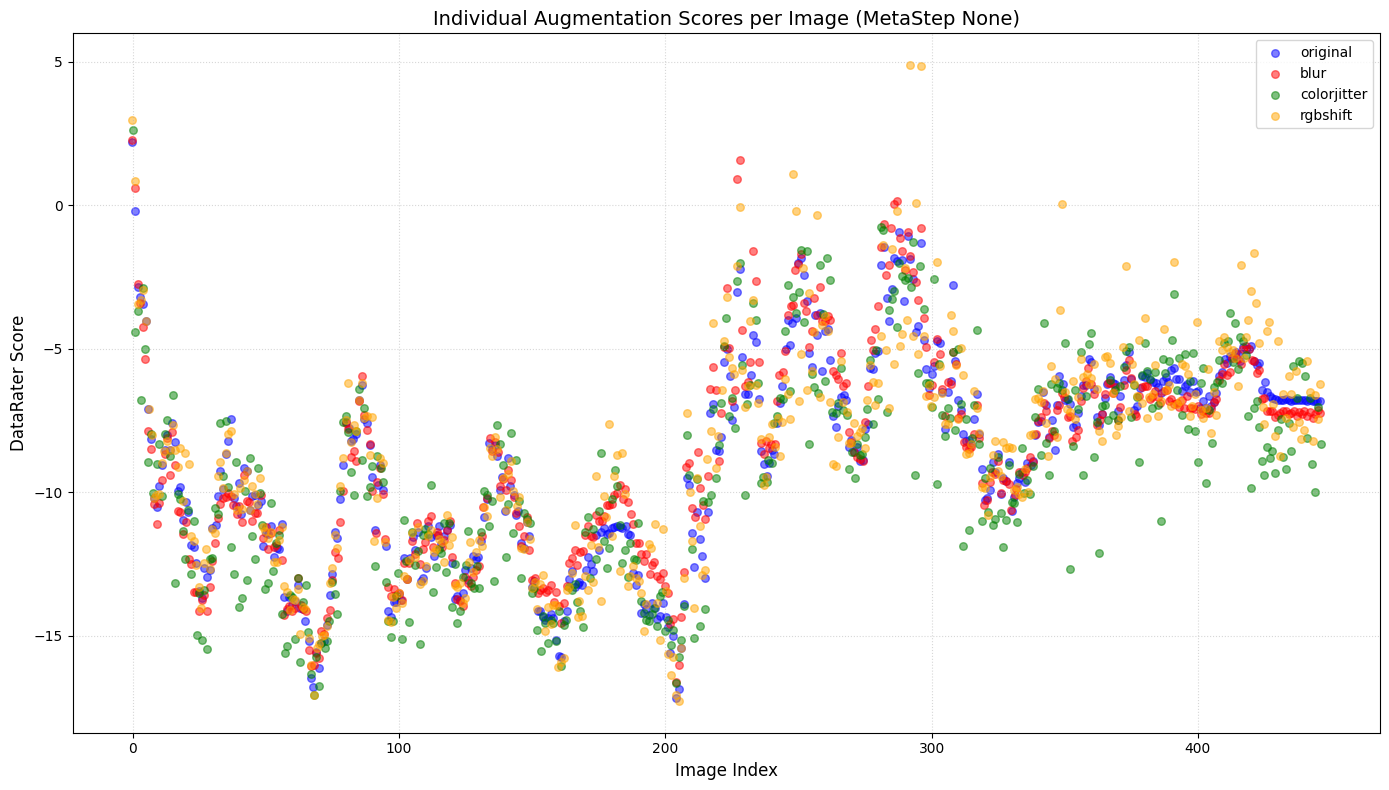


Augmentation Score Statistics:
------------------------------------------------------------
original       : mean=-8.8760, std=3.5085, n=447
blur           : mean=-8.7254, std=3.5025, n=447
colorjitter    : mean=-9.2624, std=3.6503, n=447
rgbshift       : mean=-8.6811, std=3.7227, n=447

------------------------------------------------------------
Augmentation Ranking (by mean score):
  1. rgbshift       : -8.6811
  2. blur           : -8.7254
  3. original       : -8.8760
  4. colorjitter    : -9.2624
------------------------------------------------------------
✓ Saved best augmentations to: /content/Optimal_data_augmentation/best_augmentations.pt



In [12]:
from models import load_data_rater_from_checkpoint
from analysis import analyze_with_individual_augmentations
checkpoint_path = "/content/Optimal_data_augmentation/data_rater.pt"
dr='/content/Optimal_data_augmentation'

trained_data_rater = load_data_rater_from_checkpoint(checkpoint_path)
analyze_with_individual_augmentations(trained_data_rater,train_loader,save_dir=dr)


--- Visualizing 5 Samples (MetaStep=None) ---


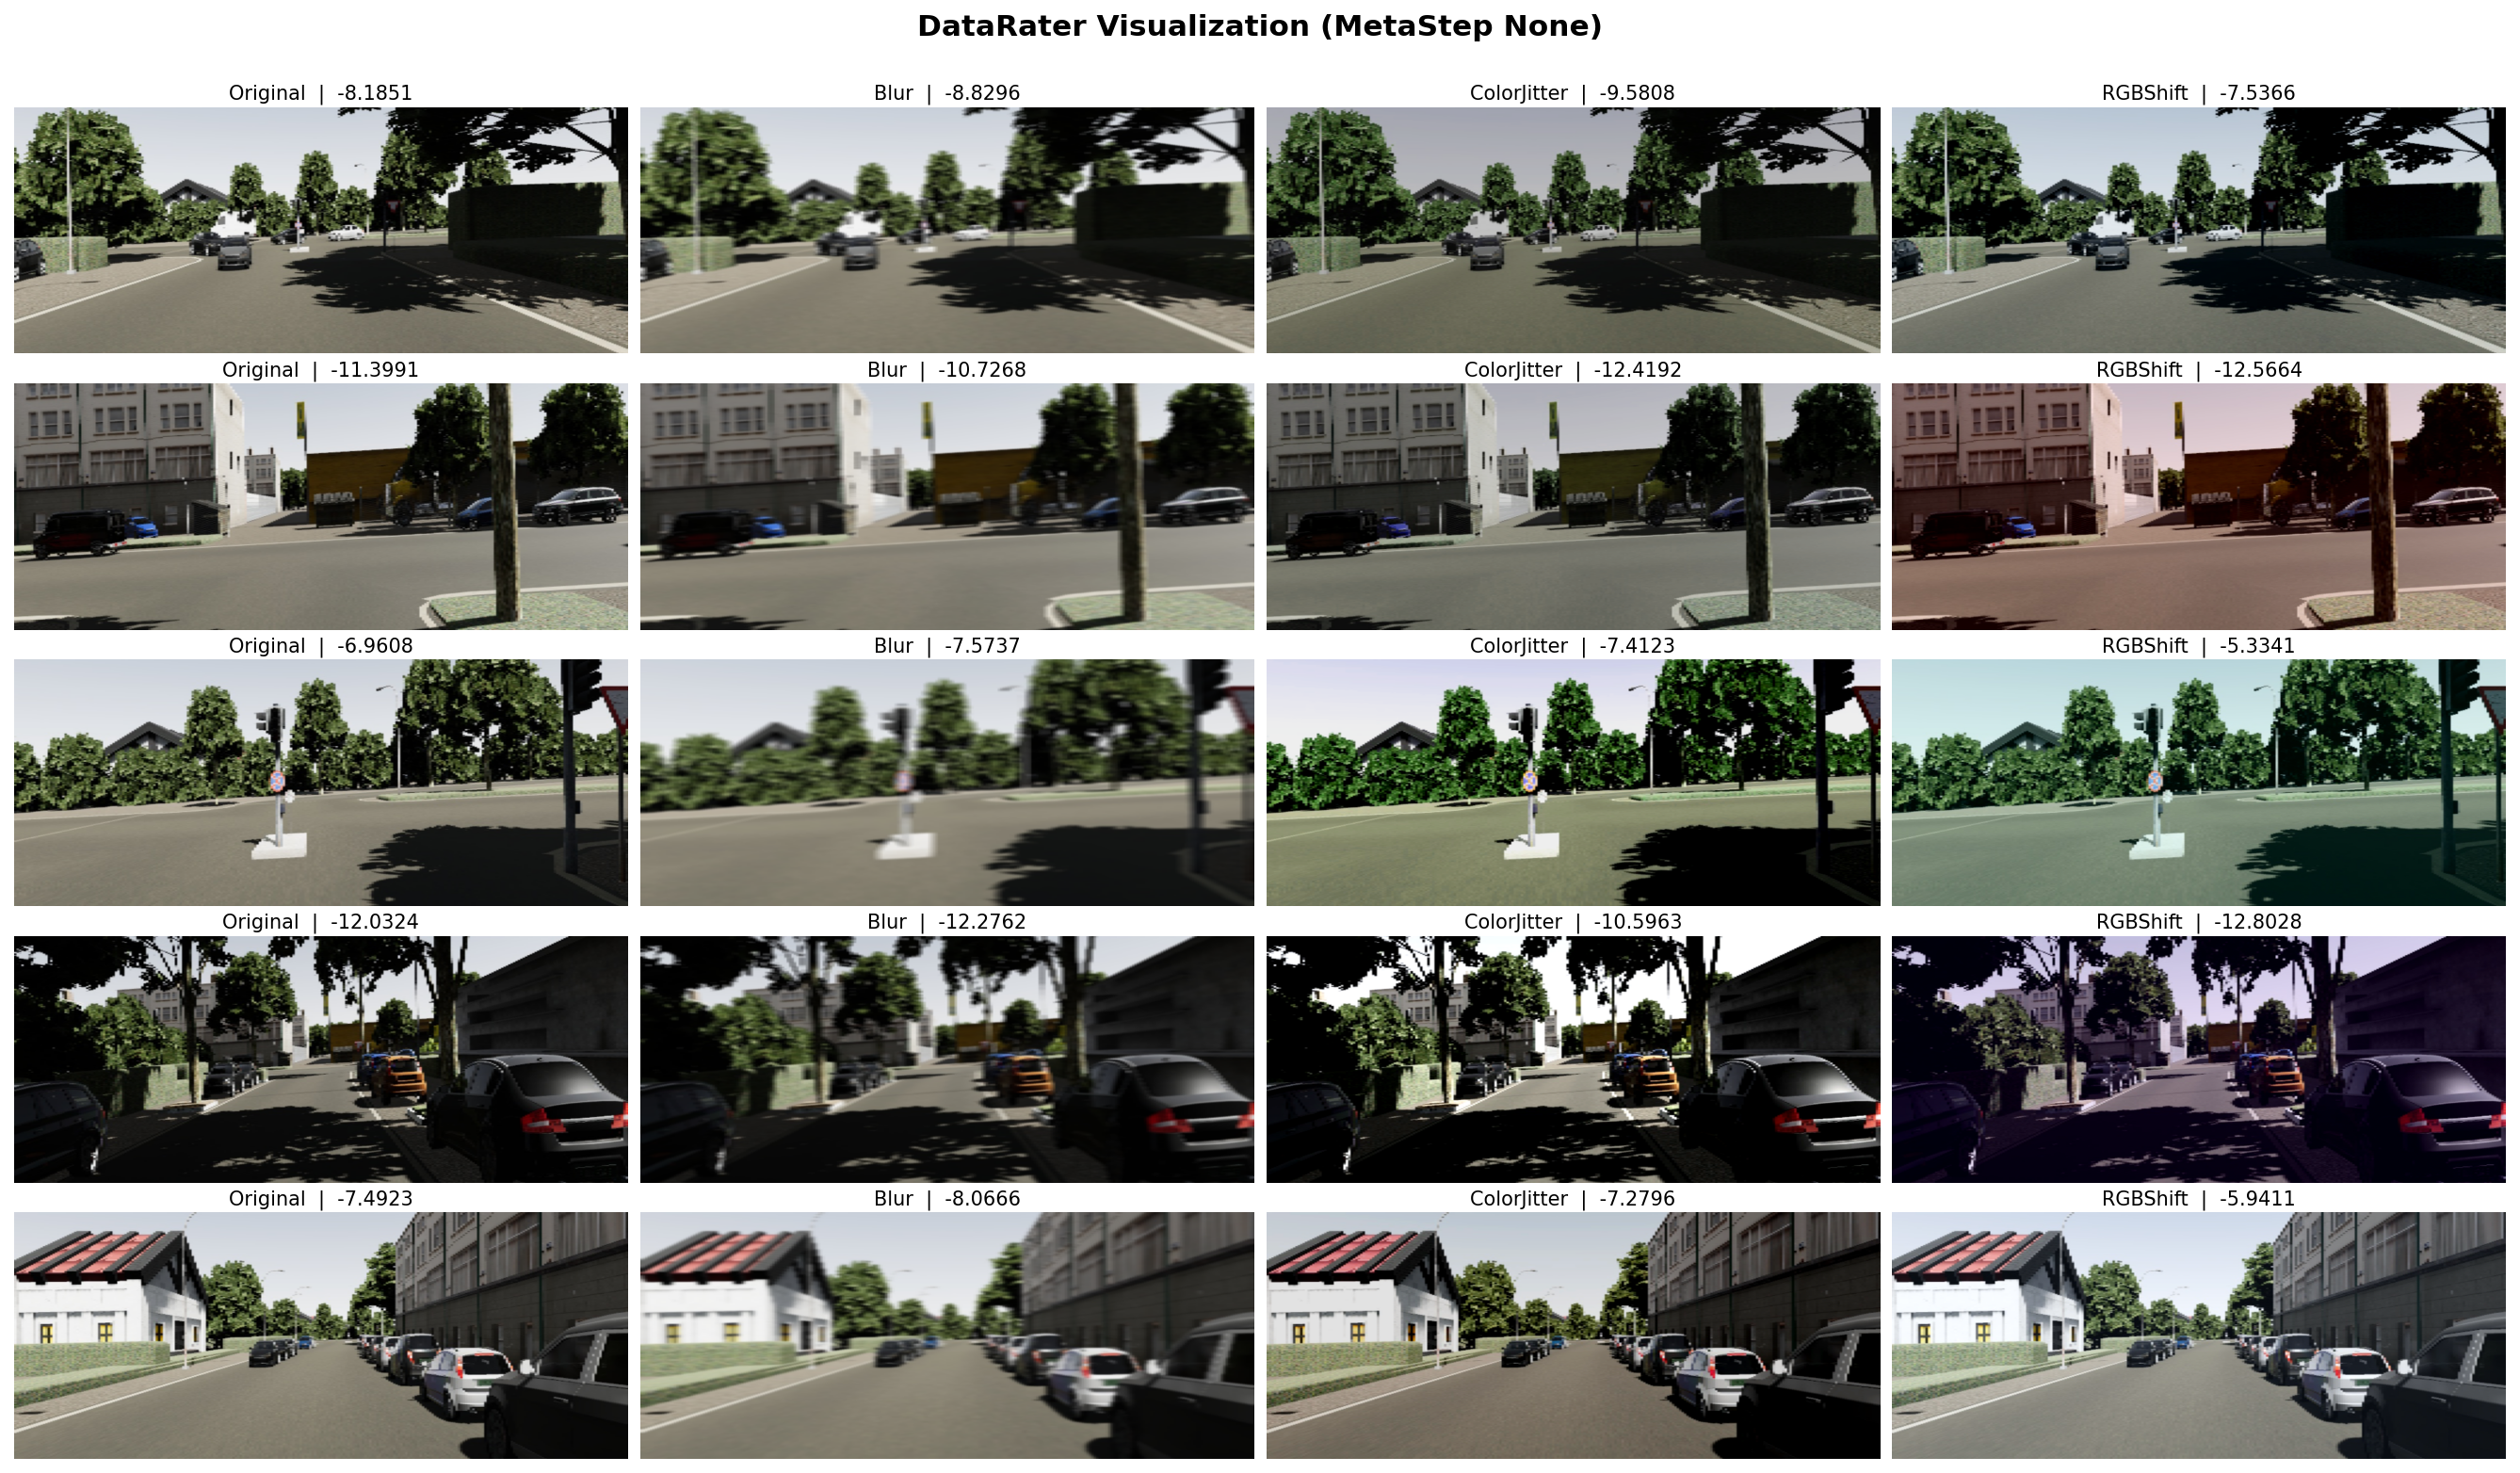

In [30]:
from analysis import visualize_samples_with_scores

visualize_samples_with_scores(trained_data_rater, train_loader, num_samples=5, current_step=None, device='cuda')

Top-K Model:

In [13]:
from models import train_k_top,SimpleSegNet
best_augs = torch.load("/content/Optimal_data_augmentation/best_augmentations.pt")
k_top=SimpleSegNet()

train_k_top(
    k_top,
    train_loader,
    val_loader,
    best_augs_dict=best_augs,  # Pass the dict here
    num_epochs=15,
    device='cuda'
)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 01: Train Loss=2.1248 | Val Loss=8.5031 | Val mIoU=0.1560


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 02: Train Loss=1.7764 | Val Loss=2.0769 | Val mIoU=0.1158


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 03: Train Loss=1.6641 | Val Loss=3.7994 | Val mIoU=0.1247


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 04: Train Loss=1.6517 | Val Loss=1.8390 | Val mIoU=0.1451


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 05: Train Loss=1.6034 | Val Loss=1.8948 | Val mIoU=0.1637


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 06: Train Loss=1.5607 | Val Loss=1.7331 | Val mIoU=0.1642


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 07: Train Loss=1.5651 | Val Loss=1.5546 | Val mIoU=0.1760


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 08: Train Loss=1.5616 | Val Loss=1.7779 | Val mIoU=0.1544


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 09: Train Loss=1.5521 | Val Loss=1.6113 | Val mIoU=0.1827


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 10: Train Loss=1.5248 | Val Loss=1.4142 | Val mIoU=0.1815


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 11: Train Loss=1.4900 | Val Loss=1.9003 | Val mIoU=0.1848


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 12: Train Loss=1.4593 | Val Loss=1.6970 | Val mIoU=0.1889


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 13: Train Loss=1.4355 | Val Loss=1.4787 | Val mIoU=0.1939


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 14: Train Loss=1.4079 | Val Loss=1.5467 | Val mIoU=0.1783


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

Epoch 15: Train Loss=1.4214 | Val Loss=1.7064 | Val mIoU=0.1895
Training complete.


In [14]:

iou_per_class, mean_iou= evaluate_segmentation(model=k_top, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

0.2087298035621643


In [8]:
from models import train_model,SimpleSegNet
Segnet=SimpleSegNet()
train_model(Segnet, train_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 01: Train Loss=2.0943 | Val Loss=2.0532 | Val mIoU=0.1610


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 02: Train Loss=1.7342 | Val Loss=2.1009 | Val mIoU=0.1300


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 03: Train Loss=1.7004 | Val Loss=2.6822 | Val mIoU=0.1555


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 04: Train Loss=1.5957 | Val Loss=2.1662 | Val mIoU=0.1587


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 05: Train Loss=1.5355 | Val Loss=1.7485 | Val mIoU=0.1647


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 06: Train Loss=1.5362 | Val Loss=1.5219 | Val mIoU=0.1818


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 07: Train Loss=1.5184 | Val Loss=1.6644 | Val mIoU=0.1929


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 08: Train Loss=1.4791 | Val Loss=1.7870 | Val mIoU=0.1882


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 09: Train Loss=1.4605 | Val Loss=1.8532 | Val mIoU=0.1906


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 10: Train Loss=1.5058 | Val Loss=2.6719 | Val mIoU=0.1694


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 11: Train Loss=1.4764 | Val Loss=1.5195 | Val mIoU=0.1878


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Epoch 12: Train Loss=1.4307 | Val Loss=1.3759 | Val mIoU=0.1976


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 13: Train Loss=1.4384 | Val Loss=1.7833 | Val mIoU=0.1839


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 14: Train Loss=1.4141 | Val Loss=1.7218 | Val mIoU=0.1764


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

Epoch 15: Train Loss=1.3942 | Val Loss=1.8984 | Val mIoU=0.1854
Training complete.


In [10]:
from models import evaluate_segmentation
iou_per_class, mean_iou= evaluate_segmentation(model=Segnet, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

0.18325921893119812


In [18]:
cj_set = SegDataset(image_dirs=image_dirs,mask_dirs=mask_dirs, dataset_type='vkitti',aug_case='CJ')
cj_loader = DataLoader(
    cj_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
cj_net=SimpleSegNet()
train_model(cj_net,cj_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 01: Train Loss=2.1337 | Val Loss=1.5980 | Val mIoU=0.1703


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 02: Train Loss=1.7817 | Val Loss=2.0508 | Val mIoU=0.1231


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 03: Train Loss=1.6655 | Val Loss=2.0014 | Val mIoU=0.1433


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 04: Train Loss=1.6169 | Val Loss=1.5355 | Val mIoU=0.1631


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 05: Train Loss=1.5538 | Val Loss=1.7019 | Val mIoU=0.1804


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 06: Train Loss=1.5523 | Val Loss=1.8575 | Val mIoU=0.1619


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 07: Train Loss=1.5447 | Val Loss=1.7016 | Val mIoU=0.1766


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 08: Train Loss=1.5083 | Val Loss=2.0993 | Val mIoU=0.1607


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 09: Train Loss=1.5038 | Val Loss=1.4952 | Val mIoU=0.1690


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 10: Train Loss=1.4743 | Val Loss=1.4992 | Val mIoU=0.1853


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Epoch 11: Train Loss=1.4712 | Val Loss=1.7800 | Val mIoU=0.1823


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 12: Train Loss=1.4659 | Val Loss=1.7354 | Val mIoU=0.1851


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 13: Train Loss=1.4712 | Val Loss=1.5909 | Val mIoU=0.1696


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 14: Train Loss=1.4537 | Val Loss=1.6838 | Val mIoU=0.1895


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

Epoch 15: Train Loss=1.3904 | Val Loss=1.6443 | Val mIoU=0.1999
Training complete.


In [20]:
iou_per_class, mean_iou= evaluate_segmentation(model=cj_net, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

0.21668533980846405


In [21]:
rgbs_set = SegDataset(image_dirs,mask_dirs, dataset_type='vkitti',aug_case='RGBS')
rgbs_loader = DataLoader(
    rgbs_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
rgb_net=SimpleSegNet()
train_model(rgb_net,cj_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 01: Train Loss=2.0616 | Val Loss=1.6115 | Val mIoU=0.1541


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 02: Train Loss=1.6930 | Val Loss=1.9575 | Val mIoU=0.1572


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 03: Train Loss=1.7168 | Val Loss=1.9536 | Val mIoU=0.1547


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 04: Train Loss=1.6224 | Val Loss=1.8075 | Val mIoU=0.1600


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 05: Train Loss=1.5739 | Val Loss=1.3840 | Val mIoU=0.1653


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 06: Train Loss=1.5839 | Val Loss=1.7102 | Val mIoU=0.1727


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 07: Train Loss=1.5296 | Val Loss=1.4336 | Val mIoU=0.1916


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 08: Train Loss=1.4808 | Val Loss=1.6020 | Val mIoU=0.1778


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 09: Train Loss=1.4573 | Val Loss=1.5635 | Val mIoU=0.1858


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 10: Train Loss=1.4981 | Val Loss=1.5339 | Val mIoU=0.1851


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 11: Train Loss=1.5167 | Val Loss=1.7603 | Val mIoU=0.1861


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 12: Train Loss=1.5083 | Val Loss=2.0687 | Val mIoU=0.1973


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 13: Train Loss=1.4669 | Val Loss=1.4064 | Val mIoU=0.2015


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 14: Train Loss=1.4441 | Val Loss=1.5470 | Val mIoU=0.1606


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

Epoch 15: Train Loss=1.4150 | Val Loss=1.6444 | Val mIoU=0.1926
Training complete.


In [22]:
iou_per_class, mean_iou= evaluate_segmentation(model=rgb_net, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

0.1868816465139389


In [23]:
blur_set = SegDataset(image_dirs,mask_dirs, dataset_type='vkitti',aug_case='BLUR')
blur_loader = DataLoader(
    blur_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
blur_net=SimpleSegNet()
train_model(blur_net,blur_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 01: Train Loss=2.1498 | Val Loss=4.0292 | Val mIoU=0.1658


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 02: Train Loss=1.7976 | Val Loss=1.6892 | Val mIoU=0.1425


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 03: Train Loss=1.6626 | Val Loss=2.0909 | Val mIoU=0.1405


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 04: Train Loss=1.5968 | Val Loss=2.1696 | Val mIoU=0.1586


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Epoch 05: Train Loss=1.5435 | Val Loss=1.7974 | Val mIoU=0.1828


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 06: Train Loss=1.5152 | Val Loss=1.7636 | Val mIoU=0.1779


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 07: Train Loss=1.5004 | Val Loss=1.7809 | Val mIoU=0.1691


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 08: Train Loss=1.5014 | Val Loss=2.4983 | Val mIoU=0.1713


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch 09: Train Loss=1.5364 | Val Loss=1.7602 | Val mIoU=0.1708


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 10: Train Loss=1.4850 | Val Loss=1.8287 | Val mIoU=0.1900


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 11: Train Loss=1.4492 | Val Loss=1.6887 | Val mIoU=0.1965


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 12: Train Loss=1.4146 | Val Loss=1.6007 | Val mIoU=0.1911


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 13: Train Loss=1.3897 | Val Loss=1.9835 | Val mIoU=0.1835


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 14: Train Loss=1.4232 | Val Loss=1.6975 | Val mIoU=0.2064


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

Epoch 15: Train Loss=1.3986 | Val Loss=1.8606 | Val mIoU=0.2020
Training complete.


In [24]:
iou_per_class, mean_iou= evaluate_segmentation(model=blur_net, dataloader=test_loader, num_classes=7, device='cuda', eps=1e-6)

print(mean_iou)

100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

0.20165914297103882


In [27]:
equal_set = SegDataset(image_dirs=image_dirs,mask_dirs=mask_dirs, dataset_type='vkitti',aug_case='EQUAL')
equal_loader = DataLoader(
    equal_set,
    batch_size=32,
    shuffle=False,
    num_workers=4,
)
equal_net=SimpleSegNet()
train_model(equal_net,equal_loader, val_loader, num_epochs=15, lr=1e-3, device='cuda')

Epoch 1/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 01: Train Loss=2.1697 | Val Loss=2.8033 | Val mIoU=0.1624


Epoch 2/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 02: Train Loss=1.7857 | Val Loss=1.9276 | Val mIoU=0.1257


Epoch 3/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch 03: Train Loss=1.6494 | Val Loss=1.9891 | Val mIoU=0.1462


Epoch 4/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch 04: Train Loss=1.5923 | Val Loss=1.6191 | Val mIoU=0.1553


Epoch 5/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 05: Train Loss=1.5750 | Val Loss=1.8983 | Val mIoU=0.1809


Epoch 6/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 06: Train Loss=1.5094 | Val Loss=1.8329 | Val mIoU=0.1780


Epoch 7/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Epoch 07: Train Loss=1.5211 | Val Loss=1.7313 | Val mIoU=0.1749


Epoch 8/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 08: Train Loss=1.5199 | Val Loss=1.7691 | Val mIoU=0.1886


Epoch 9/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Epoch 09: Train Loss=1.4729 | Val Loss=1.8298 | Val mIoU=0.1923


Epoch 10/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 10: Train Loss=1.4333 | Val Loss=1.8352 | Val mIoU=0.1940


Epoch 11/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Epoch 11: Train Loss=1.4463 | Val Loss=2.2227 | Val mIoU=0.1930


Epoch 12/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch 12: Train Loss=1.4791 | Val Loss=2.0424 | Val mIoU=0.1983


Epoch 13/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch 13: Train Loss=1.4234 | Val Loss=1.6436 | Val mIoU=0.1994


Epoch 14/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Epoch 14: Train Loss=1.4392 | Val Loss=1.5556 | Val mIoU=0.1929


Epoch 15/15 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

Epoch 15: Train Loss=1.4483 | Val Loss=1.4288 | Val mIoU=0.2134
Training complete.



Evaluating Original Synthetic...


100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Original Synthetic: Mean IoU = 0.1890

Evaluating ColorJitter...


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


ColorJitter: Mean IoU = 0.2245

Evaluating Rgb_Shift...


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Rgb_Shift: Mean IoU = 0.2175

Evaluating random_augmentation...


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


random_augmentation: Mean IoU = 0.1927

Evaluating data_rater_curated...


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

data_rater_curated: Mean IoU = 0.2285


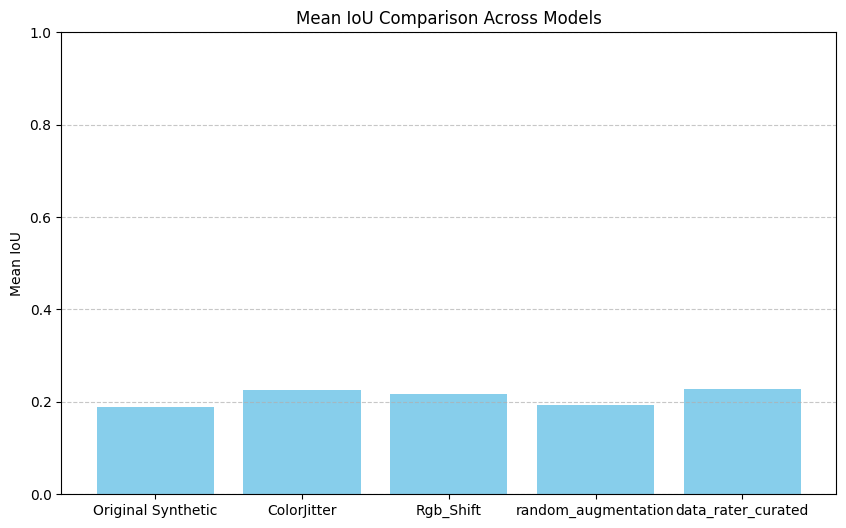

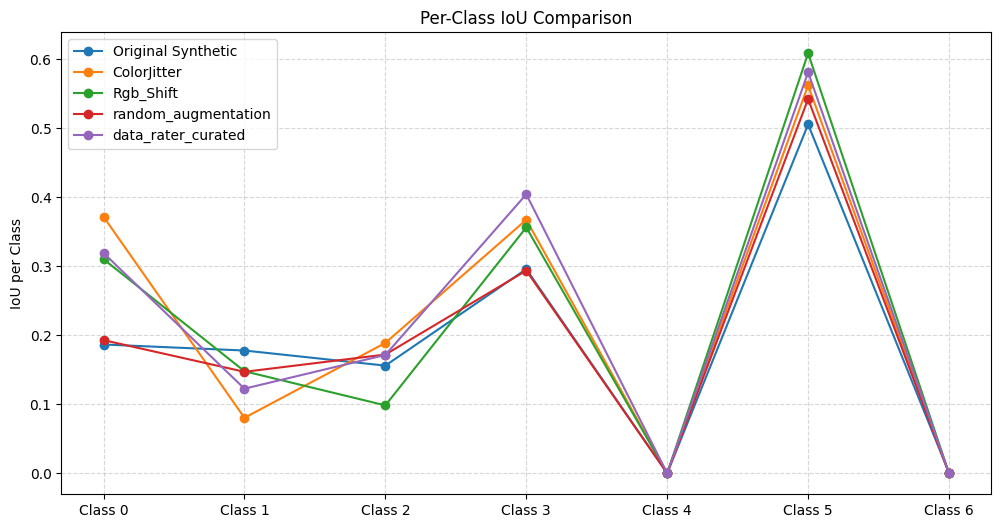

In [28]:
import matplotlib.pyplot as plt
models_list = [Segnet, cj_net, blur_net, rgb_net, equal_net,k_top]
model_names = ["Original Synthetic", "ColorJitter", "Rgb_Shift", "random_augmentation", "data_rater_curated"]

num_classes = 7
device = 'cuda'

# Dictionary to store results
miou_results = {}
iou_per_class_results = {}

for model_name, model in zip(model_names, models_list):
    print(f"\nEvaluating {model_name}...")
    iou_per_class, mean_iou = evaluate_segmentation(model, val_loader, num_classes=num_classes, device=device)

    iou_per_class_results[model_name] = iou_per_class.cpu().numpy()
    miou_results[model_name] = mean_iou

    print(f"{model_name}: Mean IoU = {mean_iou:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(miou_results.keys(), miou_results.values(), color='skyblue')
plt.ylabel("Mean IoU")
plt.title("Mean IoU Comparison Across Models")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: detailed per-class IoU
plt.figure(figsize=(12, 6))
for model_name in model_names:
    plt.plot(range(num_classes), iou_per_class_results[model_name], marker='o', label=model_name)

plt.xticks(range(num_classes), [f"Class {i}" for i in range(num_classes)])
plt.ylabel("IoU per Class")
plt.title("Per-Class IoU Comparison")
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()